In [ ]:
# technique used to reduce dimensions by figuring out most important features that impact the target values also create new features that may represent the target
# in images pixels act as features

# imp thing - scaling

# 📘 PCA (Principal Component Analysis) — Dimensionality Reduction Explained

---

## 🔹 What is PCA?
**PCA is a dimensionality reduction technique** used to:
- Reduce the number of features
- Keep the **most important information**
- Create **new features** that represent the target indirectly

📌 These new features are called **Principal Components**

---

## 🔹 Why Dimensionality Reduction?
High-dimensional data causes:
- Overfitting
- Slow model training
- Curse of dimensionality

👉 PCA helps make models:
✔ Faster  
✔ Simpler  
✔ More generalizable  

---

## 🔹 Important Clarification
- ❌ PCA does **not** select existing features  
- ✅ PCA **creates new features** by combining original ones  

---

## 🔹 Images as Features
In image datasets:
- Each **pixel = one feature**
- Example:
  - 28 × 28 image → **784 features**

📌 PCA compresses these pixels into fewer components while preserving important visual information.

---

## 🔹 How PCA Works (Intuition)
PCA:
1. Finds directions with **maximum variance**
2. Projects data onto these directions
3. Discards directions with low variance

📌 These directions are called **Principal Components (PCs)**

---

## 🔹 Why Scaling is IMPORTANT in PCA
🔴 PCA is **scale-sensitive**

If features are not scaled:
- Features with large values dominate
- PCA becomes biased

### ✅ Always scale before PCA
```python
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
```

🔹 Steps Involved in PCA

Scale data

↓

Compute covariance matrix

↓

Find eigenvectors (principal directions)

↓

Sort by importance

↓

Select top components


🔹 Explained Variance

Each principal component explains a portion of total variance.

Example:

PC1 → 50%

PC2 → 30%

PC3 → 10%

📌 PCA keeps components that explain the maximum variance

🔹 What Does PCA(0.95) Mean?

📌 Meaning:

PCA automatically selects the minimum number of components that explain 95% of the variance

✔ Prevents excessive information loss

✔ Automatically decides dimensionality

✔ Very commonly used in practice


🔹 PCA(0.95) vs PCA(n_components=10)

| Method    | Meaning                    |
| --------- | -------------------------- |
| PCA(0.95) | Variance-based selection   |
| PCA(10)   | Fixed number of components |


❌ Short answer

“Higher variance ⇒ more important feature”

❌ This is NOT always true

✅ Correct understanding

🔹 In PCA:

✔ Higher variance = more important direction

❌ NOT more important original feature

PCA does not rank original features.

🔹 What PCA actually does

PCA:

Looks at variance in the data

Finds directions (combinations of features) with maximum variance

Creates new features (principal components)

📌 These directions are linear combinations of original features.

🔹 Simple Example

Suppose you have two features:

Height (cm)

Weight (kg)


If:

Height varies more

Weight varies less

👉 PCA may create:

PC1 = 0.7 × Height + 0.3 × Weight


📌 PCA did NOT say:

Height is important

Weight is unimportant

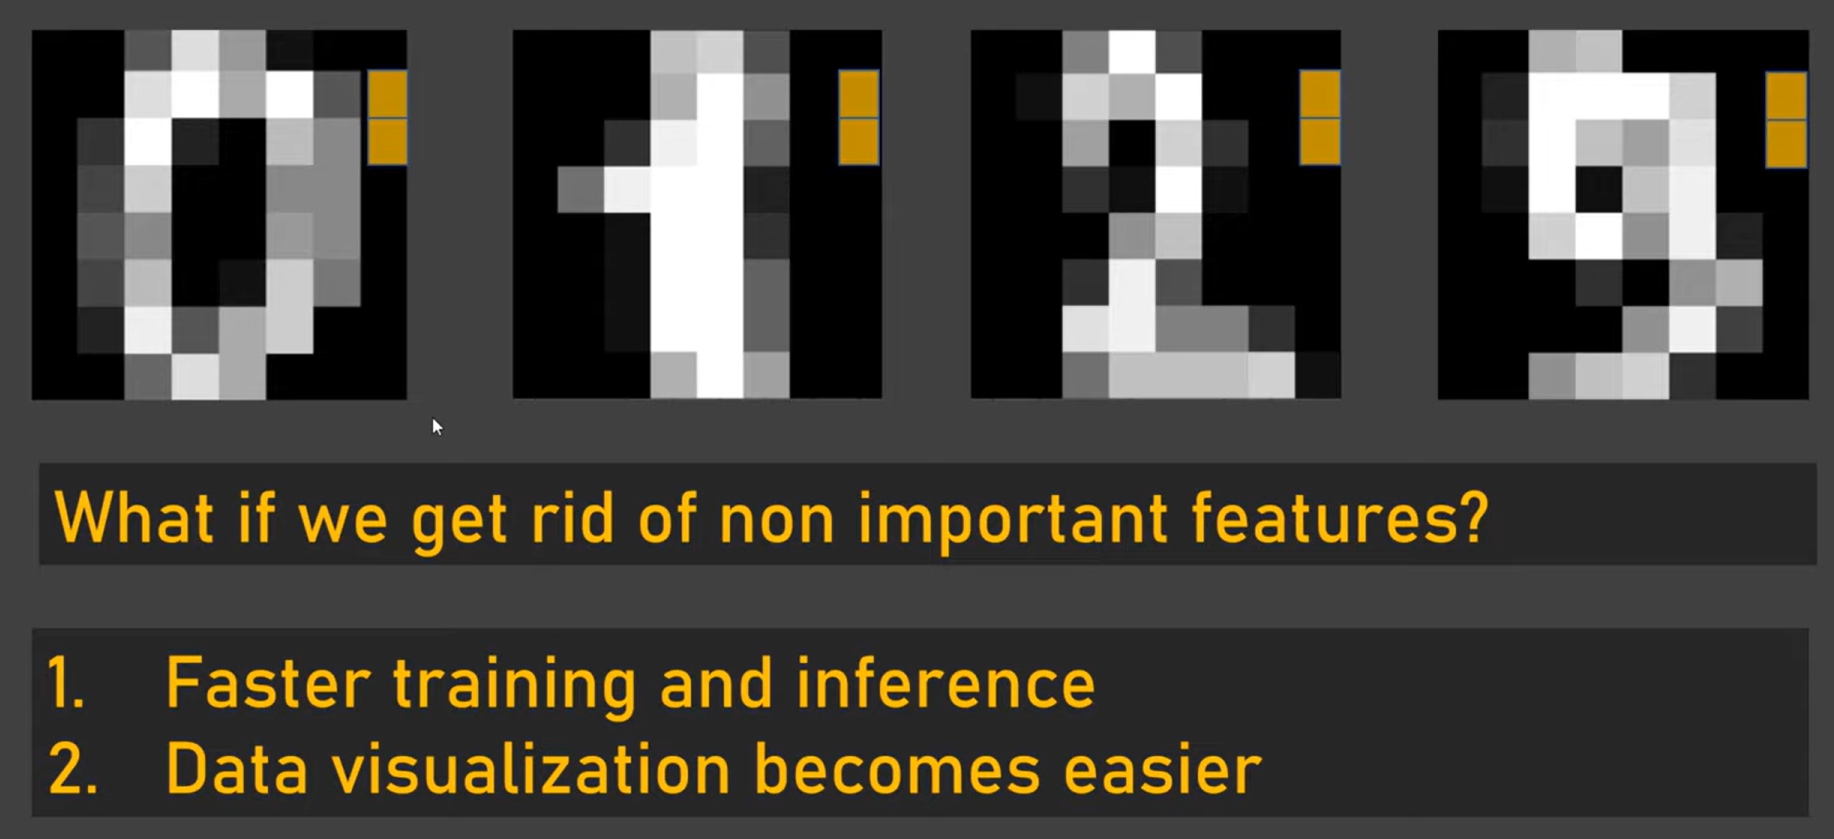
here the above orange spots dont contribute in any target predict hence those features can be removed   

In [1]:
import pandas as pd
from sklearn.datasets import load_digits


In [5]:
digits=load_digits()
dir(digits)
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [7]:
digits.data.shape

(1797, 64)

In [8]:
digits.data[0].reshape(8,8)

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

<Figure size 640x480 with 0 Axes>

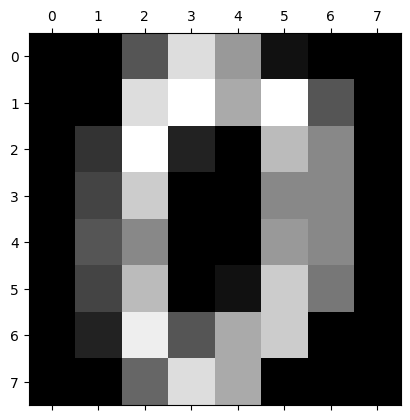

In [13]:
from matplotlib import pyplot as plt
plt.gray()
plt.matshow(digits.data[0].reshape(8,8))

In [16]:
import numpy as np
np.unique(digits.target)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [18]:
df=pd.DataFrame(digits.data,columns=digits.feature_names)
df

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [22]:
df.describe()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,3.725097,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,4.919406,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,7.000000,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,16.000000,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000


In [24]:
x=df
y=digits.target

In [25]:
# scaling 
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler() # can also use minmaxscaler
x_scaled=scaler.fit_transform(x)
x_scaled

array([[ 0.        , -0.33501649, -0.04308102, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  0.54856067,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  1.56568555,
         1.6951369 , -0.19600752],
       ...,
       [ 0.        , -0.33501649, -0.88456568, ..., -0.12952258,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.67419451, ...,  0.8876023 ,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649,  1.00877481, ...,  0.8876023 ,
        -0.26113572, -0.19600752]])

In [26]:
x.shape

(1797, 64)

In [ ]:
from sklearn.decomposition import PCA
pca=PCA(0.95)
# pca=PCA(n_components_ =2) - explicitly mentioning the wanted number of features to be selected by pca (this not only picks from existing features it also creates new )
x_pca=pca.fit_transform(x)
x_pca.shape
# thus the features has been reduced from 64 to 29

(1797, 29)

In [28]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_pca,y,test_size=0.2,random_state=30)

In [31]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(max_iter=100)
model.fit(x_train,y_train)
model.score(x_test,y_test)

C:\Users\kamal\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9722222222222222

In [33]:

pca=PCA(n_components=2) 
x_pca=pca.fit_transform(x)
x_pca.shape


(1797, 2)

In [34]:
x_pca

array([[ -1.25946645, -21.27488348],
       [  7.9576113 ,  20.76869896],
       [  6.99192297,   9.95598641],
       ...,
       [ 10.8012837 ,   6.96025223],
       [ -4.87210009, -12.42395362],
       [ -0.34438963,  -6.36554919]])

In [35]:
x_train,x_test,y_train,y_test=train_test_split(x_pca,y,test_size=0.2,random_state=30)

In [37]:
model=LogisticRegression(max_iter=1000)
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.6083333333333333